In [ ]:
# Implementing Page Rank Algorithm
import numpy as np

# Function to calculate the PageRank 
def calculate_PageRank(outlinks):
	
	
	# Damping factor
	d = 0.85
	
	# size of the matrix
	size = outlinks.shape[0]
	
	# list to hold page ranks
	page_ranks = [1 for i in range(size)]
	
	# Calculating the out degree of each node and storing in a list
	out_degrees = []
	for i in range(size):
		sums = 0
		for j in range(size):
			sums += outlinks[i][j]
		out_degrees.append(sums)
		
	#print(out_degrees)
	
	print('Initial page ranks:')
	print(page_ranks)
	
	for _ in range(100):
		for j in range(size):
			temp = 0
			for i in range(size):
				if outlinks[i][j] == 1:
					temp += page_ranks[i] / out_degrees[i]
			temp *= d
			temp += (1-d)
			page_ranks[j] = round(temp, 4)
		
	return page_ranks
			
outlinks = [0,1,0,0,0,1,0,0,  0,0,0,0,0,0,0,0,  0,1,0,0,0,0,0,0,  1,0,0,0,1,0,1,0,   0,1,1,0,0,0,0,1,  0,0,0,0,1,0,0,0,  1,1,1,0,0,1,0,0,   0,1,0,1,0,0,0,0]
outlinks = np.reshape(outlinks, (8, 8))
page_ranks = calculate_PageRank(outlinks)	
print()
print('The converged page rank is:')
print(page_ranks)
print()
sums = 0
for i in page_ranks:
	sums += i
print('The sum of page ranks is: ', round(sums, 4))

Initial page ranks:
[1, 1, 1, 1, 1, 1, 1, 1]

The converged page rank is:
[0.2758, 0.8675, 0.3388, 0.2735, 0.4958, 0.3156, 0.2275, 0.2905]

The sum of page ranks is:  3.085


In [ ]:
num_vertices = 8

In [ ]:
adjacency_matrix = [
                    [0,1,0,0,0,1,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,1,0,0,0,0,0,0],
                    [1,0,0,0,1,0,1,0],
                    [0,1,1,0,0,0,0,1],
                    [0,0,0,0,1,0,0,0],
                    [1,1,1,0,0,1,0,0],
                    [0,1,0,1,0,0,0,0],
                    ]

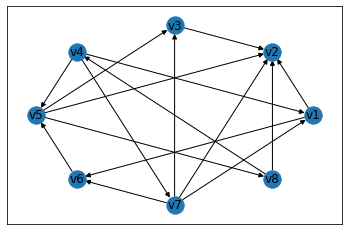

In [ ]:
vertices_list = ['v1','v2','v3','v4','v5','v6','v7','v8',]
import networkx as nx
from matplotlib import pyplot as plt 
graph = nx.DiGraph()
graph.add_nodes_from(vertices_list)

for i in range(num_vertices):
  for j in range(num_vertices):
    if adjacency_matrix[i][j] == 1:
      graph.add_edge(vertices_list[i],vertices_list[j])


nx.draw_networkx(graph, pos=nx.circular_layout(graph), arrows = True, with_labels = True)
plt.show()

In [ ]:
page_ranks_networkx = nx.pagerank(graph,alpha = 0.85)
print("The page ranks are:\n")
page_ranks_networkx

The page ranks are:



{'v1': 0.08941499371129827,
 'v2': 0.28120563198030324,
 'v3': 0.10983011816321761,
 'v4': 0.08864644387947536,
 'v5': 0.1606990303925196,
 'v6': 0.10229957241772619,
 'v7': 0.07374454250177016,
 'v8': 0.09415966695368949}

# RANDOM WALK

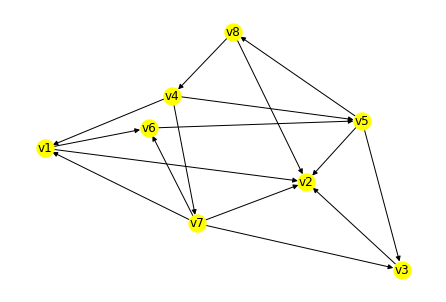

<Figure size 1080x720 with 0 Axes>


('v7', 0.07374454250177016)
('v4', 0.08864644387947536)
('v1', 0.08941499371129827)
('v8', 0.09415966695368949)
('v6', 0.10229957241772619)
('v3', 0.10983011816321761)
('v5', 0.1606990303925196)
('v2', 0.28120563198030324)
(0, 0)
(1, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(2, 1)


In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import operator

# Graph = D
nx.draw(graph, with_labels=True, node_color='yellow') 
plt.figure(figsize=(15,10))
plt.show()

random_node = random.choice([i for i in range(graph.number_of_nodes())])
dict_counter = {} 
for i in range(graph.number_of_nodes()):
    dict_counter[i] = 0

dict_counter[random_node] = dict_counter[random_node]+1

try:
  for i in range(100):
      list_for_nodes = list(graph.neighbors(random_node))
      if len(list_for_nodes)==0:# if random_node having no outgoing edges
          random_node = random.choice([i for i in range(graph.number_of_nodes())])
          dict_counter[random_node] = dict_counter[random_node]+1
          
      else:
          random_node = random.choice(list_for_nodes) #choose a node randomly from neighbors
          dict_counter[random_node] = dict_counter[random_node]+1
except nx.exception.NetworkXError:
  print("")        
     
rank_node = nx.pagerank(graph)


sorted_rank = sorted(rank_node.items(), key=operator.itemgetter(1))
sorted_random_walk = sorted(dict_counter.items(), key=operator.itemgetter(1))
# print(sorted_rank)
# print(sorted_random_walk)

for i in sorted_rank:
  print(i);
for j in sorted_random_walk:
  print(j);